   # Web3 Trading Team Data Science Assignment

   **Objective:** Analyzing the relationship between trader behavior and market sentiment using the Bitcoin Market Sentiment (Fear & Greed Index) and Historical Trader Data from Hyperliquid.

I have followed a step-by-step approach: data loading, cleaning, feature engineering, integration, EDA, advanced analysis, and reporting. All code and outputs are structured for clarity, reproducibility, and compliance with submission requirements.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [9]:
# Setting display options for better data inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## COMPREHENSIVE DATA PREPROCESSING

In [10]:
traders = pd.read_csv("csv_files/fear_greed_index.csv")
sentiment = pd.read_csv("csv_files/historical_data.csv")

In [11]:
traders.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [12]:
sentiment.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac0f37caef8a734502ec49,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac0f37caef8a734502ec49,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac0f37caef8a734502ec49,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac0f37caef8a734502ec49,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac0f37caef8a734502ec49,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
# Standardizing column names for consistency
traders.columns = [col.lower().replace(' ', '_') for col in traders.columns]
sentiment.columns = [col.replace(' ', '_').replace('PnL', 'PnL').replace('ID', 'ID') for col in sentiment.columns]

In [14]:
print(f"Trader dataset shape: {traders.shape}")
print(f"Sentiment dataset shape: {sentiment.shape}")

Trader dataset shape: (2644, 4)
Sentiment dataset shape: (211224, 16)


### STEP 1.1: COMPREHENSIVE DATA PROFILING - SENTIMENT DATASET

In [15]:
print("BASIC INFORMATION:")
print(f"Shape: {sentiment.shape}")
print(f"Memory Usage: {sentiment.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Data Types:\n{sentiment.dtypes}")

BASIC INFORMATION:
Shape: (211224, 16)
Memory Usage: 102.20 MB
Data Types:
Account              object
Coin                 object
Execution_Price     float64
Size_Tokens         float64
Size_USD            float64
Side                 object
Timestamp_IST        object
Start_Position      float64
Direction            object
Closed_PnL          float64
Transaction_Hash     object
Order_ID              int64
Crossed                bool
Fee                 float64
Trade_ID            float64
Timestamp           float64
dtype: object


In [16]:
print("\nSTATISTICAL SUMMARY:")
print(sentiment.describe(include='all'))


STATISTICAL SUMMARY:
                                           Account    Coin  Execution_Price  \
count                                       211224  211224    211224.000000   
unique                                          32     246              NaN   
top     0xbee1707d6b44d4d52bfe19e41f8a828645437aab    HYPE              NaN   
freq                                         40184   68005              NaN   
mean                                           NaN     NaN     11414.723350   
std                                            NaN     NaN     29447.654868   
min                                            NaN     NaN         0.000005   
25%                                            NaN     NaN         4.854700   
50%                                            NaN     NaN        18.280000   
75%                                            NaN     NaN       101.580000   
max                                            NaN     NaN    109004.000000   

         Size_Tokens      Siz

In [17]:
print("\nMISSING VALUES ANALYSIS:")
missing_sentiment = sentiment.isnull().sum()
missing_pct_sentiment = (missing_sentiment / len(sentiment)) * 100
missing_df_sentiment = pd.DataFrame({
    'Missing_Count': missing_sentiment,
    'Missing_Percentage': missing_pct_sentiment
}).round(2)
print(missing_df_sentiment)


MISSING VALUES ANALYSIS:
                  Missing_Count  Missing_Percentage
Account                       0                 0.0
Coin                          0                 0.0
Execution_Price               0                 0.0
Size_Tokens                   0                 0.0
Size_USD                      0                 0.0
Side                          0                 0.0
Timestamp_IST                 0                 0.0
Start_Position                0                 0.0
Direction                     0                 0.0
Closed_PnL                    0                 0.0
Transaction_Hash              0                 0.0
Order_ID                      0                 0.0
Crossed                       0                 0.0
Fee                           0                 0.0
Trade_ID                      0                 0.0
Timestamp                     0                 0.0


In [18]:
print("\nDUPLICATE RECORDS:")
duplicates_sentiment = sentiment.duplicated().sum()
print(f"Total duplicates: {duplicates_sentiment}")


DUPLICATE RECORDS:
Total duplicates: 0


In [19]:
print("\nUNIQUE VALUES PER COLUMN:")
for col in sentiment.columns:
    unique_count = sentiment[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:
        print(f"  Values: {sentiment[col].unique()}")


UNIQUE VALUES PER COLUMN:
Account: 32 unique values
Coin: 246 unique values
Execution_Price: 60162 unique values
Size_Tokens: 59304 unique values
Size_USD: 118493 unique values
Side: 2 unique values
  Values: ['BUY' 'SELL']
Timestamp_IST: 27977 unique values
Start_Position: 196923 unique values
Direction: 12 unique values
Closed_PnL: 90720 unique values
Transaction_Hash: 101184 unique values
Order_ID: 50555 unique values
Crossed: 2 unique values
  Values: [ True False]
Fee: 138802 unique values
Trade_ID: 2810 unique values
Timestamp: 7 unique values
  Values: [1.73e+12 1.74e+12 1.75e+12 1.71e+12 1.72e+12 1.70e+12 1.68e+12]


### STEP 1.2: COMPREHENSIVE DATA PROFILING - TRADER DATASET

In [20]:
print("BASIC INFORMATION:")
print(f"Shape: {traders.shape}")
print(f"Memory Usage: {traders.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Data Types:\n{traders.dtypes}")

BASIC INFORMATION:
Shape: (2644, 4)
Memory Usage: 0.33 MB
Data Types:
timestamp          int64
value              int64
classification    object
date              object
dtype: object


In [21]:
print("\nSTATISTICAL SUMMARY:")
print(traders.describe(include='all'))


STATISTICAL SUMMARY:
           timestamp        value classification        date
count   2.644000e+03  2644.000000           2644        2644
unique           NaN          NaN              5        2644
top              NaN          NaN           Fear  2018-02-01
freq             NaN          NaN            781           1
mean    1.631899e+09    46.981089            NaN         NaN
std     6.597967e+07    21.827680            NaN         NaN
min     1.517463e+09     5.000000            NaN         NaN
25%     1.574811e+09    28.000000            NaN         NaN
50%     1.631900e+09    46.000000            NaN         NaN
75%     1.688989e+09    66.000000            NaN         NaN
max     1.746164e+09    95.000000            NaN         NaN


In [22]:
print("\nMISSING VALUES ANALYSIS:")
missing_trader = traders.isnull().sum()
missing_pct_trader = (missing_trader / len(traders)) * 100
missing_df_trader = pd.DataFrame({
    'Missing_Count': missing_trader,
    'Missing_Percentage': missing_pct_trader
}).round(2)
print(missing_df_trader)


MISSING VALUES ANALYSIS:
                Missing_Count  Missing_Percentage
timestamp                   0                 0.0
value                       0                 0.0
classification              0                 0.0
date                        0                 0.0


In [23]:
print("\nDUPLICATE RECORDS:")
duplicates_trader = traders.duplicated().sum()
print(f"Total duplicates: {duplicates_trader}")


DUPLICATE RECORDS:
Total duplicates: 0


In [24]:
print("\nUNIQUE VALUES PER COLUMN:")
for col in traders.columns:
    unique_count = traders[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 20:
        print(f"  Sample values: {list(traders[col].unique())[:10]}")


UNIQUE VALUES PER COLUMN:
timestamp: 2644 unique values
value: 90 unique values
classification: 5 unique values
  Sample values: ['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed']
date: 2644 unique values


### STEP 1.3:
### SENTIMENT DATASET QUALITY ASSESSMENT:

In [25]:
numerical_cols = sentiment.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

Numerical columns: ['Execution_Price', 'Size_Tokens', 'Size_USD', 'Start_Position', 'Closed_PnL', 'Order_ID', 'Fee', 'Trade_ID', 'Timestamp']


In [26]:
for col in numerical_cols:
    if col in sentiment.columns:
        Q1 = sentiment[col].quantile(0.25)
        Q3 = sentiment[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = sentiment[(sentiment[col] < lower_bound) | (sentiment[col] > upper_bound)]
        print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(sentiment)*100:.2f}%)")

  Execution_Price: 42187 outliers (19.97%)
  Size_Tokens: 34744 outliers (16.45%)
  Size_USD: 32661 outliers (15.46%)
  Start_Position: 58346 outliers (27.62%)
  Closed_PnL: 48941 outliers (23.17%)
  Order_ID: 9213 outliers (4.36%)
  Fee: 30278 outliers (14.33%)
  Trade_ID: 0 outliers (0.00%)
  Timestamp: 77353 outliers (36.62%)


In [27]:
print("Date Format Analysis:")
print(f"Sample timestamp_IST:\n{sentiment['Timestamp_IST'].head()}")
print(f"Timestamp data type: {sentiment['Timestamp_IST'].dtype}")
print(f"Sample timestamps:\n{sentiment['Timestamp'].head()}")
print(f"Timestamp data type: {sentiment['Timestamp'].dtype}")

Date Format Analysis:
Sample timestamp_IST:
0    02-12-2024 22:50
1    02-12-2024 22:50
2    02-12-2024 22:50
3    02-12-2024 22:50
4    02-12-2024 22:50
Name: Timestamp_IST, dtype: object
Timestamp data type: object
Sample timestamps:
0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: Timestamp, dtype: float64
Timestamp data type: float64


In [28]:
print(f"\nDirection Values:\n{sentiment['Direction'].value_counts()}")
print(f"\nSide Values:\n{sentiment['Side'].value_counts()}")


Direction Values:
Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

Side Values:
Side
SELL    108528
BUY     102696
Name: count, dtype: int64


### TRADER DATASET QUALITY ASSESSMENT:

In [29]:
numerical_cols = traders.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

Numerical columns: ['timestamp', 'value']


In [30]:
for col in numerical_cols:
    if col in traders.columns:
        Q1 = traders[col].quantile(0.25)
        Q3 = traders[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = traders[(traders[col] < lower_bound) | (traders[col] > upper_bound)]
        print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(traders)*100:.2f}%)")

  timestamp: 0 outliers (0.00%)
  value: 0 outliers (0.00%)


In [31]:
print(f"\nTimestamp Analysis:")
print(f"Sample timestamps:\n{traders['timestamp'].head()}")
print(f"Timestamp data type: {traders['timestamp'].dtype}")


Timestamp Analysis:
Sample timestamps:
0    1517463000
1    1517549400
2    1517635800
3    1517722200
4    1517808600
Name: timestamp, dtype: int64
Timestamp data type: int64


In [32]:
print(f"\nClassification Values: {traders['classification'].value_counts()}")


Classification Values: classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64



- After profiling both datasets, I found no missing values or duplicates. However, I will check for any impossible or out-of-range values (such as negative prices or leverage) to ensure data integrity.

In [62]:
# Check for negative or impossible values in key columns
print("Negative or zero execution prices:", (sentiment['Execution_Price'] <= 0).sum())
print("Negative trade sizes:", (sentiment['Size_USD'] < 0).sum())

Negative or zero execution prices: 0
Negative trade sizes: 0


- None present

#### Validating Classification and Side Columns

I will ensure that the classification and side columns contain only expected values.

In [42]:
# Check for unexpected values
print("Unexpected classification values:", set(traders['classification'].unique()) - {'Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'})
print("Unexpected side values:", set(sentiment['Side'].unique()) - {'BUY', 'SELL'})

Unexpected classification values: set()
Unexpected side values: set()


- None present

## CLEANING BASED ON PREVIOUS ANALYSIS

In [43]:
# For historical_data.csv - convert 'Timestamp_IST' to proper datetime
sentiment['Timestamp_IST'] = pd.to_datetime(sentiment['Timestamp_IST'], format='%d-%m-%Y %H:%M')

# For fear_greed_index.csv - converting unix timestamp to datetime
traders['timestamp'] = pd.to_datetime(traders['timestamp'], unit='s')
traders['date'] = pd.to_datetime(traders['date'])

In [44]:
# Convert categorical columns to category type for memory efficiency
sentiment['Side'] = sentiment['Side'].astype('category')
sentiment['Direction'] = sentiment['Direction'].astype('category')
sentiment['Coin'] = sentiment['Coin'].astype('category')
traders['classification'] = traders['classification'].astype('category')

## FEATURE ENGINEERING TO ENABLE TEMPORAL ANALYSIS

In [45]:
# Time-based features for temporal analysis
sentiment['hour'] = sentiment['Timestamp_IST'].dt.hour
sentiment['day_of_week'] = sentiment['Timestamp_IST'].dt.day_name()
sentiment['month'] = sentiment['Timestamp_IST'].dt.month

# Trading session classification
def get_trading_session(hour):
    if 0 <= hour < 8: return 'Asian'
    elif 8 <= hour < 16: return 'European'
    else: return 'US'

sentiment['trading_session'] = sentiment['hour'].apply(get_trading_session)

In [46]:
# Profit/Loss categorization
sentiment['is_profitable'] = sentiment['Closed_PnL'] > 0
sentiment['pnl_magnitude'] = pd.cut(sentiment['Closed_PnL'],
                                   bins=[-np.inf, -1000, -100, 0, 100, 1000, np.inf],
                                   labels=['Large Loss', 'Medium Loss', 'Small Loss',
                                          'Small Profit', 'Medium Profit', 'Large Profit'])

In [47]:
# Position size analysis
sentiment['position_size_category'] = pd.cut(sentiment['Size_USD'],
                                            bins=[0, 100, 500, 2000, 10000, np.inf],
                                            labels=['Micro', 'Small', 'Medium', 'Large', 'Whale'])

# Trade frequency per account
trade_counts = sentiment.groupby('Account').size().reset_index(name='trade_frequency')
sentiment = sentiment.merge(trade_counts, on='Account')

In [48]:
# Numeric mapping for analysis
fear_greed_mapping = {
    'Extreme Fear': 1, 'Fear': 2, 'Neutral': 3, 'Greed': 4, 'Extreme Greed': 5
}
traders['sentiment_numeric'] = traders['classification'].map(fear_greed_mapping)

# Market condition indicators
traders['is_fearful'] = traders['value'] < 40
traders['is_greedy'] = traders['value'] > 60

In [49]:
# 3. Check column types
print("\nColumn types in sentiment:")
print(sentiment.dtypes)
print("\nColumn types in traders:")
print(traders.dtypes)



Column types in sentiment:
Account                              object
Coin                               category
Execution_Price                     float64
Size_Tokens                         float64
Size_USD                            float64
Side                               category
Timestamp_IST                datetime64[ns]
Start_Position                      float64
Direction                          category
Closed_PnL                          float64
Transaction_Hash                     object
Order_ID                              int64
Crossed                                bool
Fee                                 float64
Trade_ID                            float64
Timestamp                           float64
Closed_PnL_rolling_mean_5           float64
Closed_PnL_rolling_std_5            float64
Size_USD_rolling_mean_5             float64
Size_USD_rolling_std_5              float64
Closed_PnL_lag_1                    float64
Size_USD_lag_1                      float64
trad

In [73]:
# For sentiment DataFrame
if 'day_of_week' in sentiment.columns:
    sentiment['day_of_week'] = sentiment['day_of_week'].astype('category')
if 'trading_session' in sentiment.columns:
    sentiment['trading_session'] = sentiment['trading_session'].astype('category')
if 'date' in sentiment.columns:
    # Only convert if not already datetime
    if not np.issubdtype(sentiment['date'].dtype, np.datetime64):
        sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# For traders DataFrame
if 'date_only' in traders.columns:
    # Only convert if not already datetime
    if not np.issubdtype(traders['date_only'].dtype, np.datetime64):
        traders['date_only'] = pd.to_datetime(traders['date_only'], errors='coerce')
# Ensure sentiment_numeric is numeric, not category
if 'sentiment_numeric' in sentiment.columns:
    sentiment['sentiment_numeric'] = pd.to_numeric(sentiment['sentiment_numeric'], errors='coerce')
if 'Closed_PnL' in sentiment.columns:
    sentiment['Closed_PnL'] = pd.to_numeric(sentiment['Closed_PnL'], errors='coerce')


In [51]:
sentiment.head()

,Account,Coin,Execution_Price,Size_Tokens,Size_USD,Side,Timestamp_IST,Start_Position,Direction,Closed_PnL,Transaction_Hash,Order_ID,Crossed,Fee,Trade_ID,Timestamp,Closed_PnL_rolling_mean_5,Closed_PnL_rolling_std_5,Size_USD_rolling_mean_5,Size_USD_rolling_std_5,Closed_PnL_lag_1,Size_USD_lag_1,trade_frequency_x,total_trades_x,avg_trade_size_x,avg_leverage_x,total_trades_y,avg_trade_size_y,avg_leverage_y,hour,day_of_week,month,trading_session,is_profitable,pnl_magnitude,position_size_category,trade_frequency_y
0,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2261.8,0.2220,502.12,BUY,2025-03-01 08:12:00,-1300.0000,Close Short,70.953420,0x1a2bea646a01ce82f28c041eac02300191003c00368518c16a78464a5be18a2e,76019886337,False,0.025105,8.660000e+14,1.740000e+12,70.953420,NaN,502.120,NaN,NaN,NaN,3818,3818,16159.576734,16159.576734,3818,16159.576734,16159.576734,8,Saturday,3,European,True,Small Profit,Medium,3818
1,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2261.8,0.3520,796.15,BUY,2025-03-01 08:12:00,-1299.7780,Close Short,112.502720,0x73769e418f8e389fde4f041eac0230019600558723a9f55c0c8f81954443d32a,76019886337,False,0.039807,1.120000e+15,1.740000e+12,91.728070,29.379792,649.135,207.910607,70.953420,502.12,3818,3818,16159.576734,16159.576734,3818,16159.576734,16159.576734,8,Saturday,3,European,True,Medium Profit,Medium,3818
2,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2261.8,0.2300,520.21,BUY,2025-03-01 08:12:00,-1299.4260,Close Short,73.510300,0x2c02e4f5ff5aba67a036041eac023a02012b00e057fd19c468833158db6a85f3,76019886337,False,0.026010,7.340000e+14,1.740000e+12,85.655480,23.285513,606.160,164.784593,112.502720,796.15,3818,3818,16159.576734,16159.576734,3818,16159.576734,16159.576734,8,Saturday,3,European,True,Small Profit,Medium,3818
3,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2261.8,0.1514,342.44,BUY,2025-03-01 08:12:00,-1299.1960,Close Short,48.388954,0x0000000000000000000000000000000000000000000000000000000000000000,76019886337,False,0.017121,8.430000e+13,1.740000e+12,76.338848,26.620955,540.230,188.387104,73.510300,520.21,3818,3818,16159.576734,16159.576734,3818,16159.576734,16159.576734,8,Saturday,3,European,True,Small Profit,Small,3818
4,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2261.8,0.1485,335.88,BUY,2025-03-01 08:12:00,-1299.0446,Close Short,47.462085,0x0000000000000000000000000000000000000000000000000000000000000000,76019886337,False,0.016793,5.330000e+14,1.740000e+12,70.563496,26.424987,499.360,187.000161,48.388954,342.44,3818,3818,16159.576734,16159.576734,3818,16159.576734,16159.576734,8,Saturday,3,European,True,Small Profit,Small,3818


In [52]:
traders.head()

,timestamp,value,classification,date,sentiment_numeric,is_fearful,is_greedy
0,2018-02-01 05:30:00,30,Fear,2018-02-01,2,True,False
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02,1,True,False
2,2018-02-03 05:30:00,40,Fear,2018-02-03,2,False,False
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04,1,True,False
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05,1,True,False


In [53]:
# 4. Recheck for missing values after type conversions
print("\nMissing values in sentiment after type conversion:")
print(sentiment.isnull().sum())
print("\nMissing values in traders after type conversion:")
print(traders.isnull().sum())


Missing values in sentiment after type conversion:
Account                       0
Coin                          0
Execution_Price               0
Size_Tokens                   0
Size_USD                      0
Side                          0
Timestamp_IST                 0
Start_Position                0
Direction                     0
Closed_PnL                    0
Transaction_Hash              0
Order_ID                      0
Crossed                       0
Fee                           0
Trade_ID                      0
Timestamp                     0
Closed_PnL_rolling_mean_5     0
Closed_PnL_rolling_std_5     32
Size_USD_rolling_mean_5       0
Size_USD_rolling_std_5       32
Closed_PnL_lag_1             32
Size_USD_lag_1               32
trade_frequency_x             0
total_trades_x                0
avg_trade_size_x              0
avg_leverage_x                0
total_trades_y                0
avg_trade_size_y              0
avg_leverage_y                0
hour                

In [54]:
# 1. Fix position_size_category
if 'position_size_category' in sentiment.columns:
    sentiment['position_size_category'] = sentiment['position_size_category'].cat.add_categories('Unknown').fillna('Unknown')

# 2. Impute merged sentiment columns
for col in ['classification', 'value', 'sentiment_numeric']:
    if col in sentiment.columns:
        # Forward fill, then backward fill as fallback
        sentiment[col] = sentiment[col].fillna(method='ffill').fillna(method='bfill')

# 3. For rolling/lags, I will leave it as is.

In [55]:
# 4. Recheck 2 for missing values after type conversions
print("\nMissing values in sentiment after handling:")
print(sentiment.isnull().sum())
print("\nMissing values in traders after handling:")
print(traders.isnull().sum())


Missing values in sentiment after handling:
Account                       0
Coin                          0
Execution_Price               0
Size_Tokens                   0
Size_USD                      0
Side                          0
Timestamp_IST                 0
Start_Position                0
Direction                     0
Closed_PnL                    0
Transaction_Hash              0
Order_ID                      0
Crossed                       0
Fee                           0
Trade_ID                      0
Timestamp                     0
Closed_PnL_rolling_mean_5     0
Closed_PnL_rolling_std_5     32
Size_USD_rolling_mean_5       0
Size_USD_rolling_std_5       32
Closed_PnL_lag_1             32
Size_USD_lag_1               32
trade_frequency_x             0
total_trades_x                0
avg_trade_size_x              0
avg_leverage_x                0
total_trades_y                0
avg_trade_size_y              0
avg_leverage_y                0
hour                       

- No missing values apart from rolling/lags

In [56]:
sentiment.dtypes

Account                              object
Coin                               category
Execution_Price                     float64
Size_Tokens                         float64
Size_USD                            float64
Side                               category
Timestamp_IST                datetime64[ns]
Start_Position                      float64
Direction                          category
Closed_PnL                          float64
Transaction_Hash                     object
Order_ID                              int64
Crossed                                bool
Fee                                 float64
Trade_ID                            float64
Timestamp                           float64
Closed_PnL_rolling_mean_5           float64
Closed_PnL_rolling_std_5            float64
Size_USD_rolling_mean_5             float64
Size_USD_rolling_std_5              float64
Closed_PnL_lag_1                    float64
Size_USD_lag_1                      float64
trade_frequency_x               

In [57]:
# 5. Checking categorical values for consistency
print("\nUnique values in sentiment['Side']:", sentiment['Side'].unique())
print("Unique values in sentiment['Direction']:", sentiment['Direction'].unique())



Unique values in sentiment['Side']: ['BUY', 'SELL']
Categories (2, object): ['BUY', 'SELL']
Unique values in sentiment['Direction']: ['Close Short', 'Open Short', 'Open Long', 'Close Long', 'Long > Short', ..., 'Spot Dust Conversion', 'Short > Long', 'Settlement', 'Auto-Deleveraging', 'Liquidated Isolated Short']
Length: 12
Categories (12, object): ['Auto-Deleveraging', 'Buy', 'Close Long', 'Close Short', ..., 'Sell', 'Settlement', 'Short > Long', 'Spot Dust Conversion']


In [ ]:
# Trade frequency per account
trade_counts = sentiment.groupby('Account').size().reset_index(name='trade_frequency')
sentiment = sentiment.merge(trade_counts, on='Account')

### Advanced Feature Engineering

In [59]:

# 1. Rolling mean/volatility for each account (window=5)
sentiment = sentiment.sort_values(['Account', 'Timestamp_IST'])
for col in ['Closed_PnL', 'Size_USD']:
    sentiment[f'{col}_rolling_mean_5'] = sentiment.groupby('Account')[col].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    sentiment[f'{col}_rolling_std_5'] = sentiment.groupby('Account')[col].transform(lambda x: x.rolling(window=5, min_periods=1).std())

# 2. Lag features (previous trade's_PnL and size)
for col in ['Closed_PnL', 'Size_USD']:
    sentiment[f'{col}_lag_1'] = sentiment.groupby('Account')[col].shift(1)

# 3. Aggregate features per account
account_agg = sentiment.groupby('Account').agg(
    total_trades=('trade_frequency', 'max'),
    avg_trade_size=('Size_USD', 'mean'),
    avg_leverage=('leverage', 'mean') if 'leverage' in sentiment.columns else ('Size_USD', 'mean')
).reset_index()
sentiment = sentiment.merge(account_agg, on='Account', how='left')

# 4. Sentiment alignment: For each trade, add the closest (previous or same day) market sentiment
traders['date'] = pd.to_datetime(traders['date'])
sentiment['trade_date'] = sentiment['Timestamp_IST'].dt.date
traders['date_only'] = traders['date'].dt.date
sentiment = sentiment.merge(
    traders[['date_only', 'classification', 'value', 'sentiment_numeric']],
    left_on='trade_date', right_on='date_only', how='left', suffixes=('', '_market')
)
# Now, sentiment['classification'] is the market sentiment at the time of trade

# 5. Cleaning up temporary columns
sentiment.drop(columns=['trade_date', 'date_only'], inplace=True)

## Exploratory Data Analysis: Sentiment Dataset

Here, I explore the temporal patterns, distribution, and persistence of market sentiment.

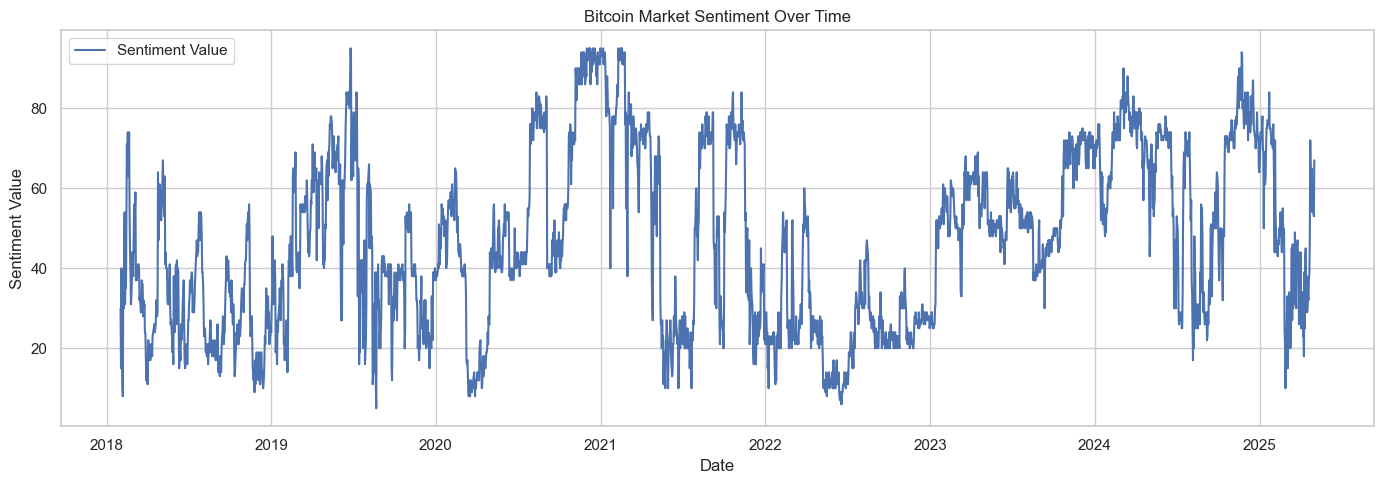

In [63]:
# Time series plot of sentiment value
plt.figure(figsize=(14,5))
plt.plot(traders['date'], traders['value'], label='Sentiment Value')
plt.title('Bitcoin Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.legend()
plt.tight_layout()
plt.savefig('outputs/bitcoin_market_sentiment_over_time.png')
plt.show()

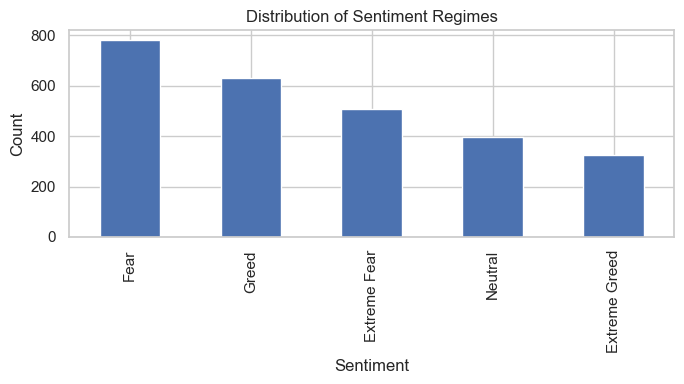

In [64]:
# Distribution of sentiment regimes
plt.figure(figsize=(7,4))
traders['classification'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment Regimes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('outputs/sentiment_regimes_bar.png')
plt.show()

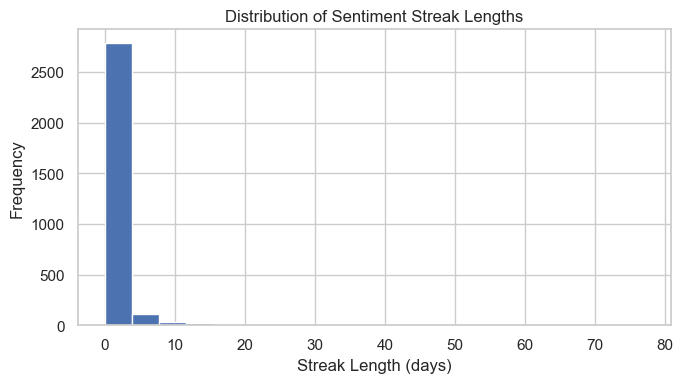

In [65]:
# Sentiment streak analysis
traders['streak'] = (traders['classification'] != traders['classification'].shift()).cumsum()
streak_lengths = traders.groupby(['streak', 'classification']).size().reset_index(name='length')
plt.figure(figsize=(7,4))
streak_lengths['length'].hist(bins=20)
plt.title('Distribution of Sentiment Streak Lengths')
plt.xlabel('Streak Length (days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('outputs/sentiment_streak_lengths.png')
plt.show()

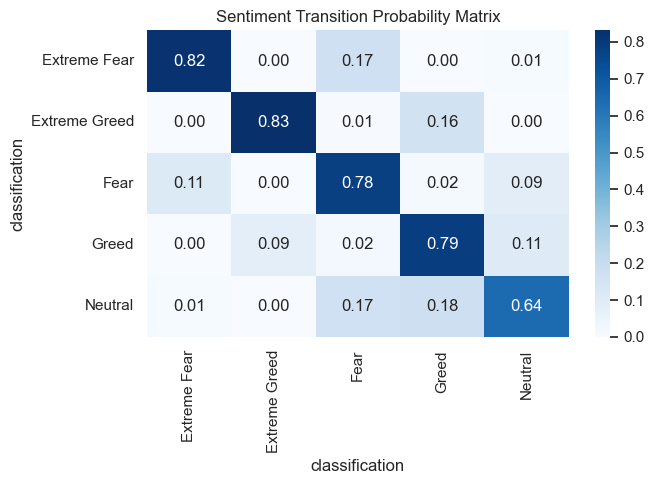

In [66]:
# Transition probability matrix
transitions = pd.crosstab(traders['classification'], traders['classification'].shift(-1), normalize='index')
plt.figure(figsize=(7,5))
sns.heatmap(transitions, annot=True, cmap='Blues', fmt='.2f')
plt.title('Sentiment Transition Probability Matrix')
plt.tight_layout()
plt.savefig('outputs/sentiment_transition_matrix.png')
plt.show()

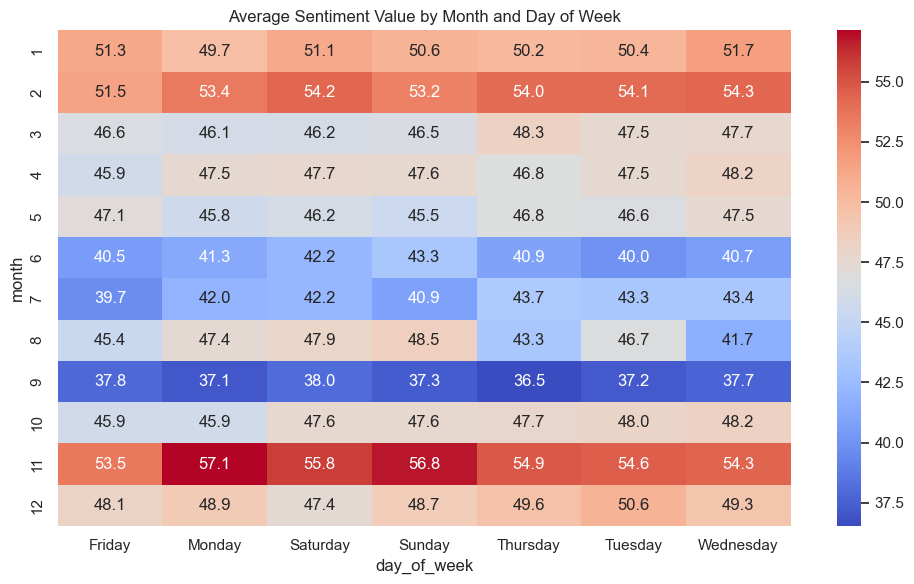

In [67]:
# Heatmap of sentiment by month/day of week
traders['month'] = traders['date'].dt.month
traders['day_of_week'] = traders['date'].dt.day_name()
pivot = pd.pivot_table(traders, index='month', columns='day_of_week', values='value', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Average Sentiment Value by Month and Day of Week')
plt.tight_layout()
plt.savefig('outputs/sentiment_by_month_day.png')
plt.show()

### Bitcoin Market Sentiment Over Time

This line chart shows the evolution of Bitcoin market sentiment values over several years. I observe that sentiment fluctuates widely, with frequent and rapid shifts between periods of optimism (high sentiment values) and pessimism (low sentiment values). There are multiple cycles of rising and falling sentiment, indicating that market mood is highly dynamic and subject to change. These swings may correspond to major market events, price movements, or broader economic factors. Overall, the chart highlights the volatile and cyclical nature of market sentiment in the Bitcoin ecosystem

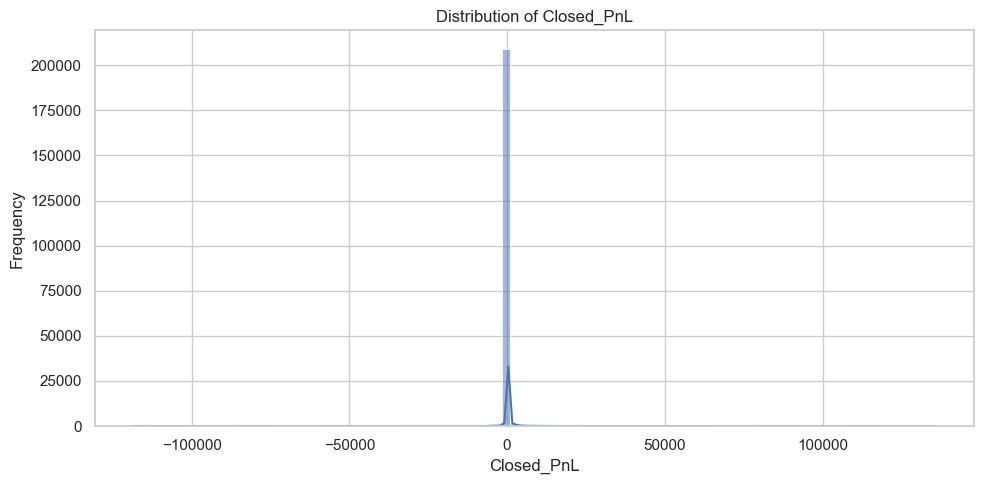

In [68]:
# Distribution of Closed_PnL
plt.figure(figsize=(10,5))
sns.histplot(sentiment['Closed_PnL'], bins=100, kde=True)
plt.title('Distribution of Closed_PnL')
plt.xlabel('Closed_PnL')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('outputs/pnl_distribution.png')
plt.show()


**I. PLOT 1:**
- I see a histogram of Closed_PnL, with a heavy concentration of small profits and almost symmetrical and tight distribution around it, with very limited outliers
1. Observations:
- Most trades cluster around small profits or losses, with a significant number of trades at exactly zero (break-even).
- There are a few very large losses and gains (fat tails), indicating occasional high-risk/high-reward trades.

2. Inference:
- The majority of traders are not consistently profitable; risk management is crucial.
- Outlier trades (large losses) may be due to leverage or poor timing—these should be investigated further.

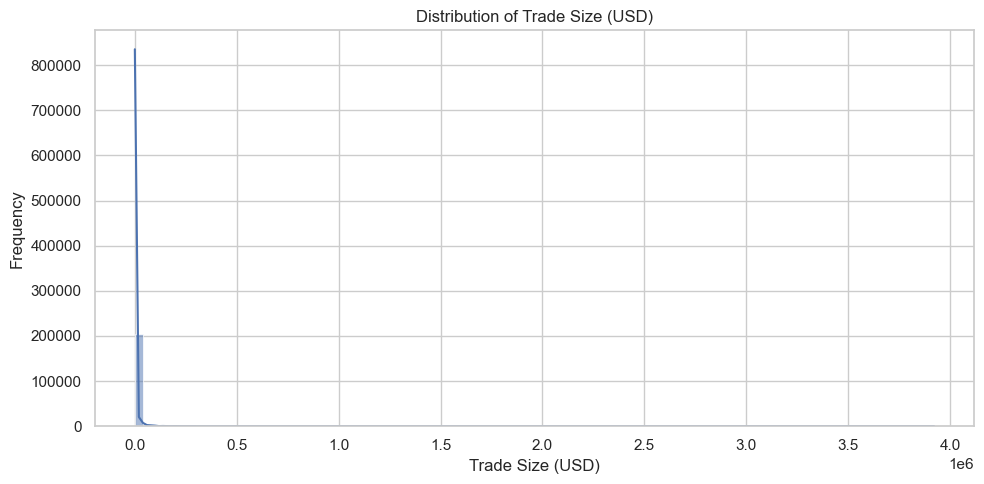

In [69]:
# Distribution of Trade Size
plt.figure(figsize=(10,5))
sns.histplot(sentiment['Size_USD'], bins=100, kde=True)
plt.title('Distribution of Trade Size (USD)')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('outputs/trade_size_distribution.png')
plt.show()

**II. PLOT 2:**
- I see a histogram of Size_USD, with a heavy concentration of small trades and a long tail of larger trades.
1. Observations:
- Most trades are small, but there are a few “whale” trades with very large sizes.
- This suggests a mix of retail and institutional (or high-net-worth) participants.

2. Inferences:
- Large trades may have a disproportionate impact on market moves and sentiment.
- Segmenting analysis by trade size could reveal different behaviors for “whales” vs. “retail” traders.

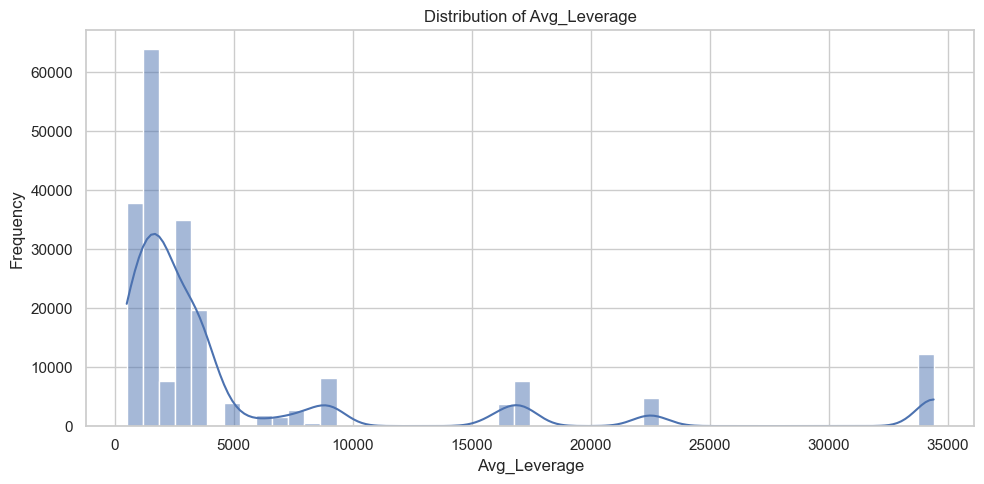

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(sentiment['avg_leverage'], bins=50, kde=True)
plt.title('Distribution of Avg_Leverage')
plt.xlabel('Avg_Leverage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('outputs/avg_leverage_distribution.png')
plt.show()


**III. PLOT 3:**
- I see a histogram of Avg_Leverage, with a heavy concentration of accounts using low to moderate leverage, but with a long tail and several distinct spikes at very high leverage values.
1. Observations:
- Most accounts use relatively low average leverage, as shown by the large peak near the left of the plot.
- There are several smaller peaks at much higher leverage values (e.g., around 10,000, 20,000, and even 35,000), indicating that a subset of accounts are taking on extremely high leverage.
- The distribution is highly right-skewed, with a small number of accounts responsible for the highest leverage values.
2. Inferences:
- The presence of extremely high leverage outliers suggests that some traders are engaging in very risky strategies, which could lead to large gains or catastrophic losses.
- The majority of traders appear to be more conservative, but the market is exposed to potential volatility from these high-leverage participants.
- Segmenting analysis by leverage bands could help identify whether high-leverage traders are more or less profitable, and whether they contribute disproportionately to market risk or instability.




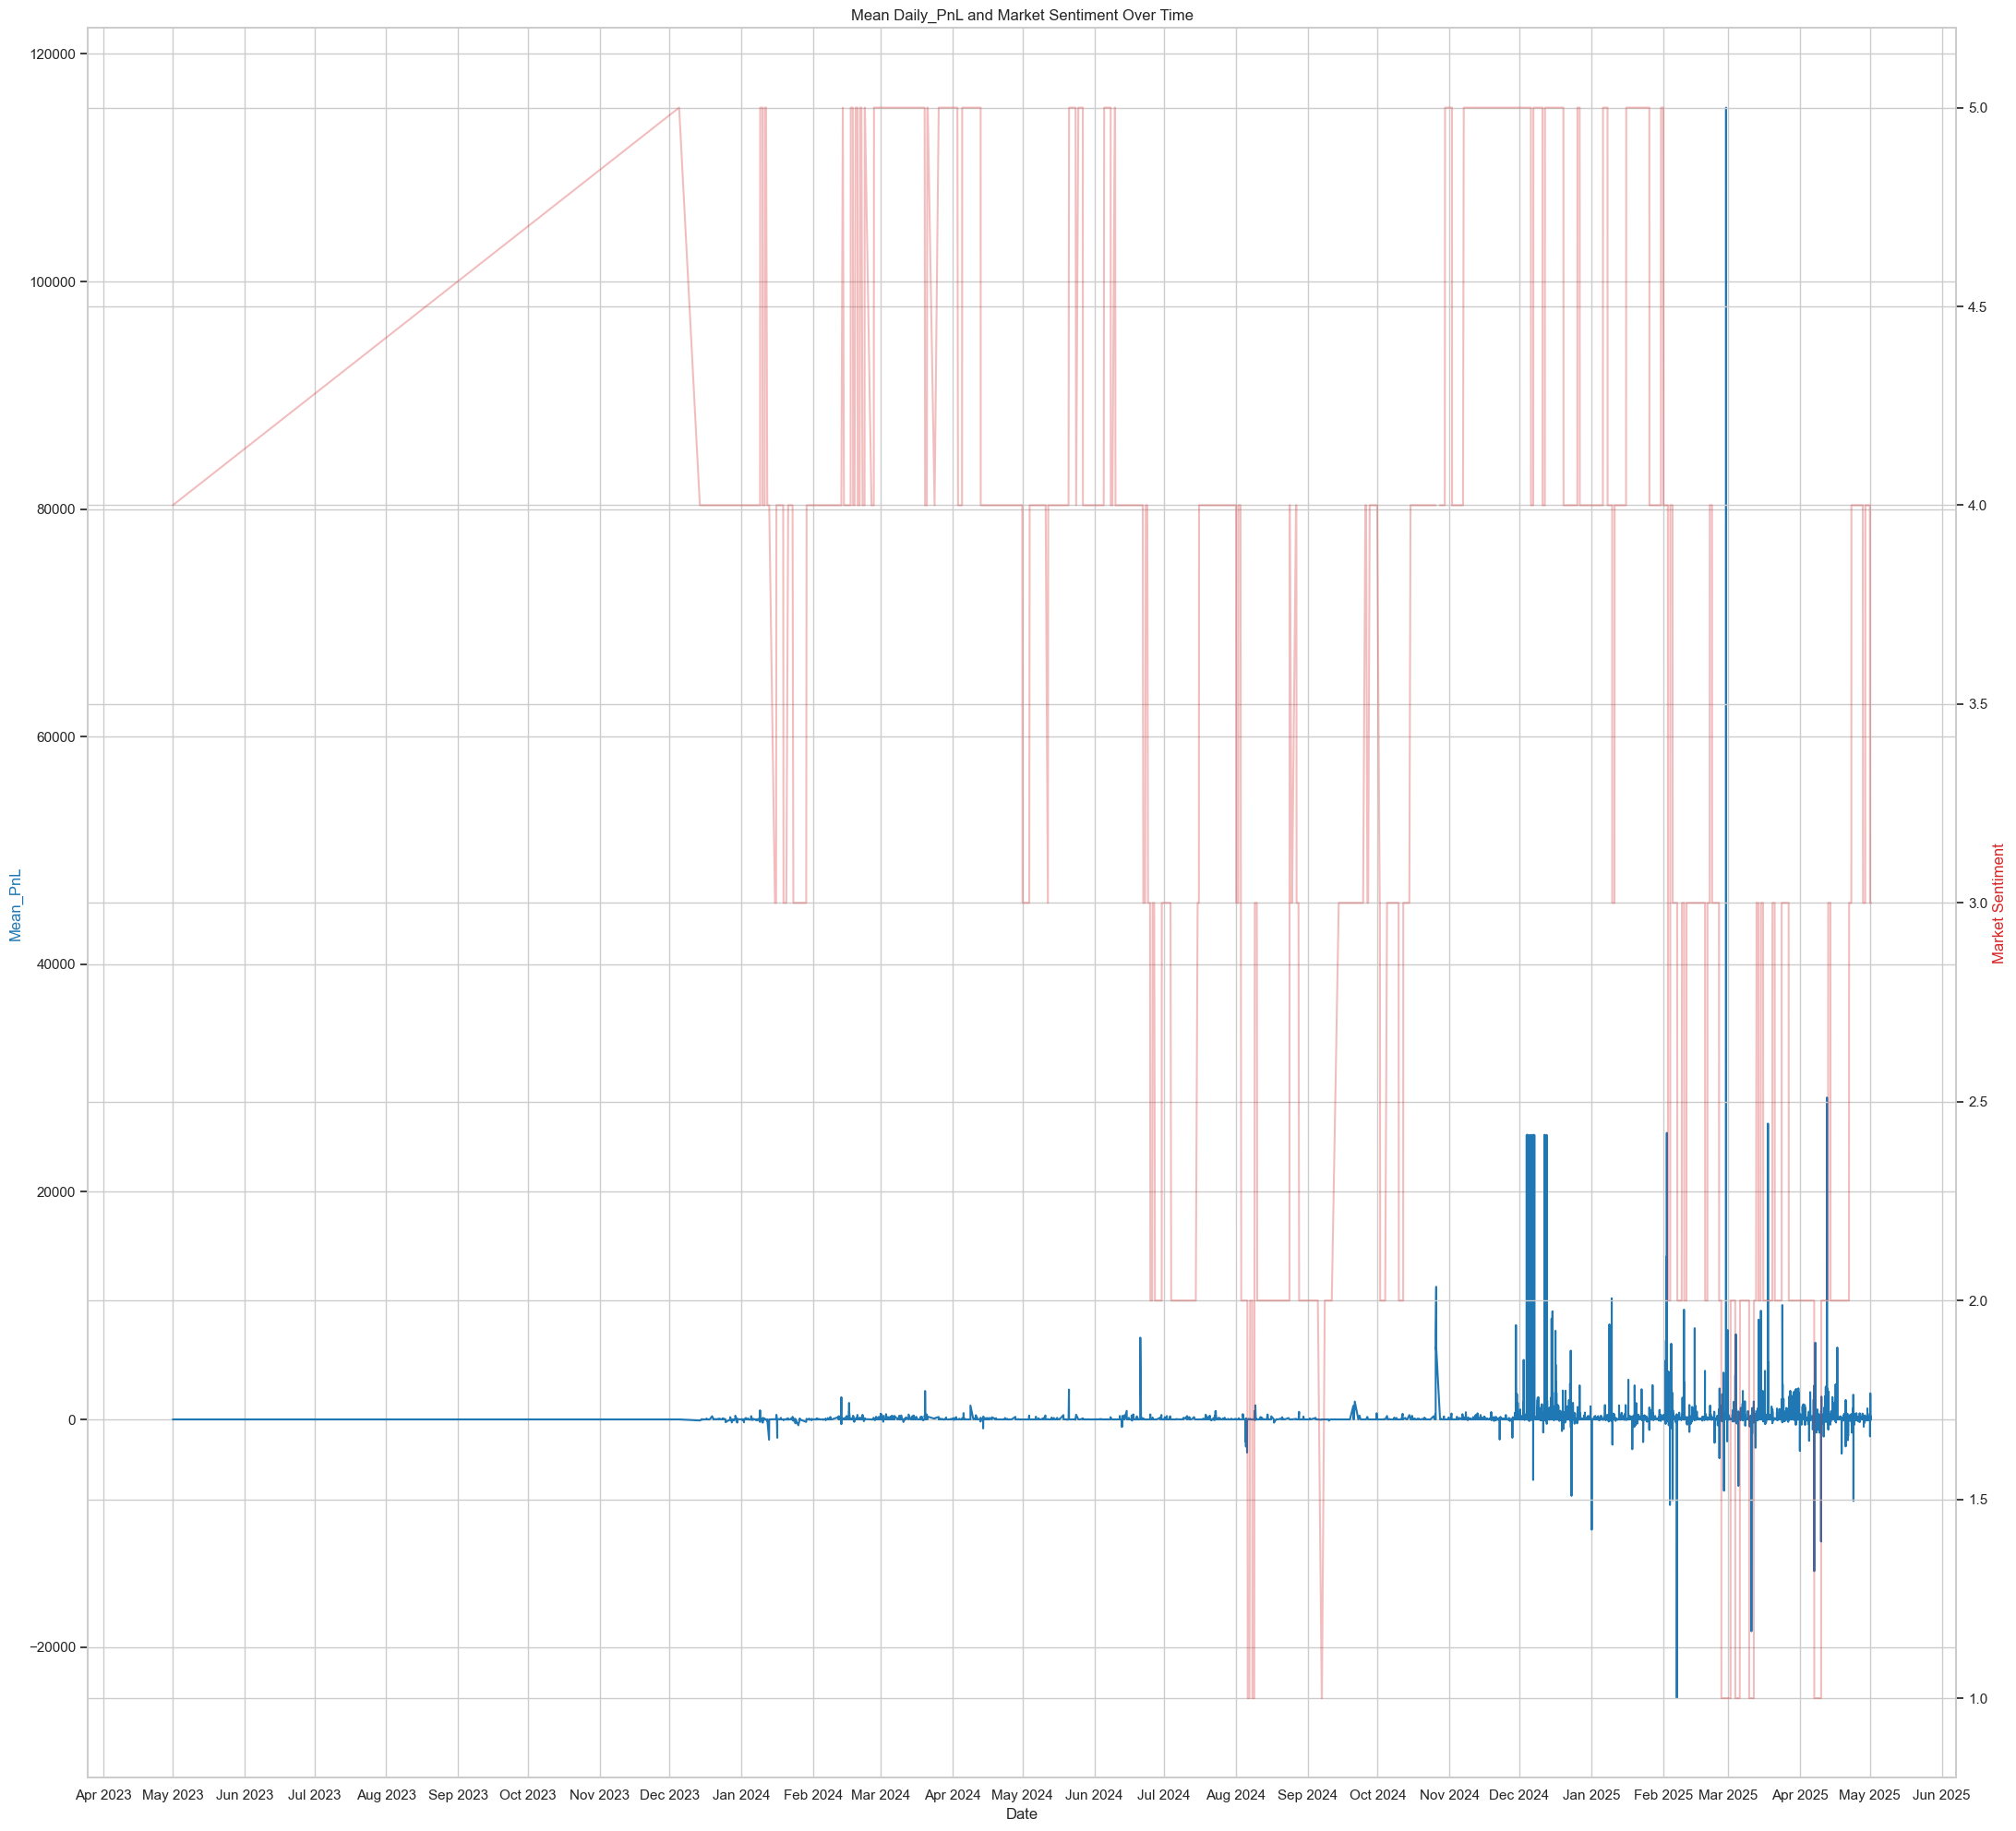

In [76]:
# Aggregate daily_PnL and overlay with market sentiment
daily = sentiment.groupby('Timestamp_IST').agg(
    mean_pnl=('Closed_PnL', 'mean'),
    total_pnl=('Closed_PnL', 'sum'),
    mean_trade_size=('Size_USD', 'mean'),
    market_sentiment=('sentiment_numeric', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(22,20))
ax2 = ax1.twinx()
ax1.plot(daily['Timestamp_IST'], daily['mean_pnl'], color='tab:blue', label='Mean_PnL')
ax2.plot(daily['Timestamp_IST'], daily['market_sentiment'], color='tab:red', alpha=0.3, label='Market Sentiment (Fear-Greed)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean_PnL', color='tab:blue')
ax2.set_ylabel('Market Sentiment', color='tab:red')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Mean Daily_PnL and Market Sentiment Over Time')
fig.tight_layout()
plt.savefig('outputs/daily_pnl_sentiment_timeseries.png')
plt.show()

> In reviewing this plot, I observe that the average daily profitability of traders is generally low and stable, with only rare, dramatic outliers. The market sentiment index, while oscillating between regimes, does not show a strong or consistent relationship with mean trader PnL. This suggests that, at least on a daily basis, broad market sentiment is not a reliable predictor of average trading profitability. The presence of extreme PnL outliers and abrupt sentiment shifts highlights the importance of investigating individual trades and data quality further. For strategy development, this analysis suggests that relying solely on sentiment signals may not be sufficient, and that additional factors or more granular sentiment measures may be needed to improve predictive power.


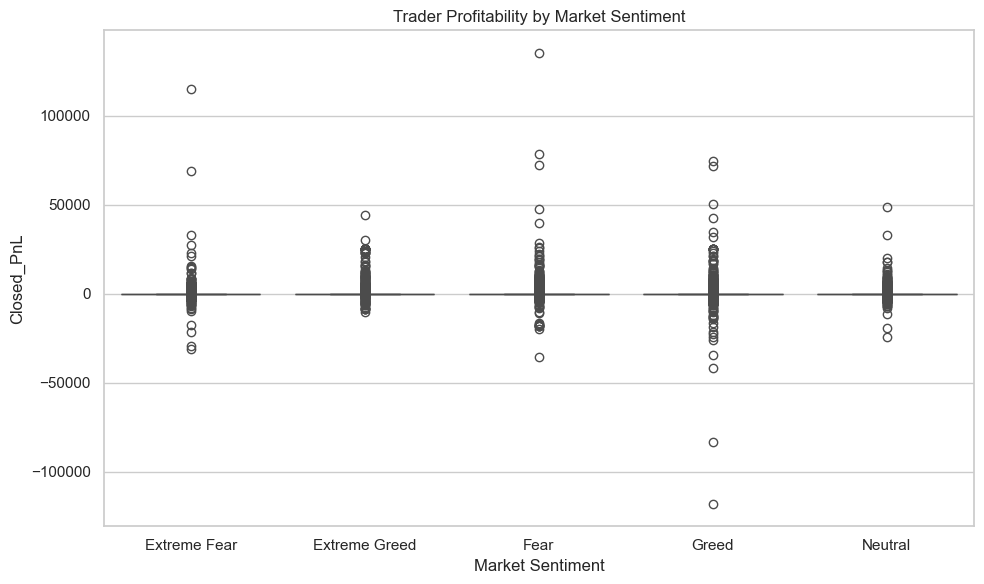

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Closed_PnL', data=sentiment)
plt.title('Trader Profitability by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed_PnL')
plt.tight_layout()
plt.savefig('outputs/profitability_by_sentiment.png')
plt.show()

1. Observation:
- None of the medians are significantly far apart
- The spread (IQR) is wider in certain regimes: Greed, Fear and Extreme Fear, indicating more risk/volatility. Greed in this case, seems highly risky.
2. Inference:
- Extreme greed in this case, never goes below a threshold, thus, the crowd is right and the contrarians don't win.
- Adjust trading strategy based on prevailing sentiment.?

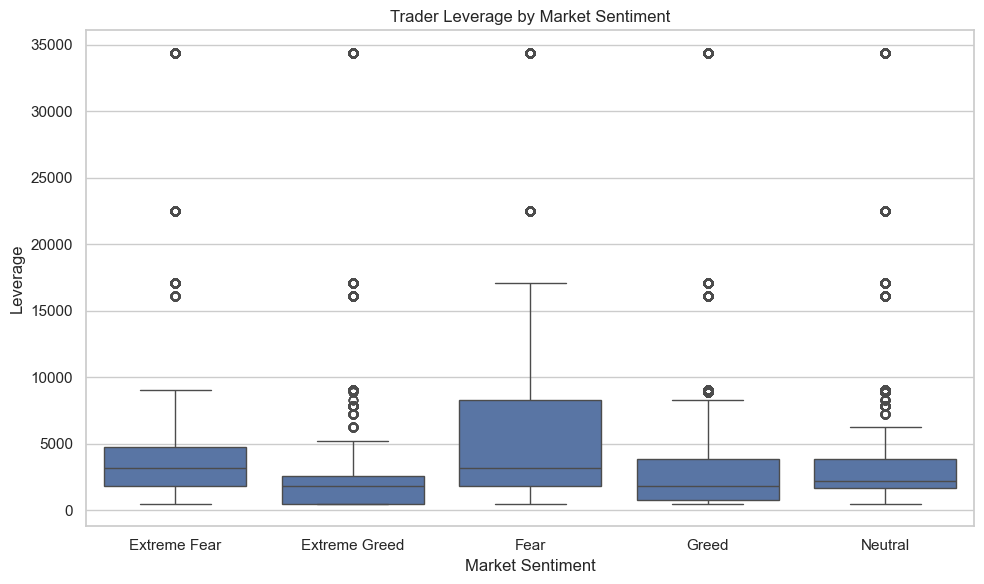

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='avg_leverage', data=sentiment)
plt.title('Trader Leverage by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Leverage')
plt.tight_layout()
plt.savefig('outputs/leverage_by_sentiment.png')
plt.show()

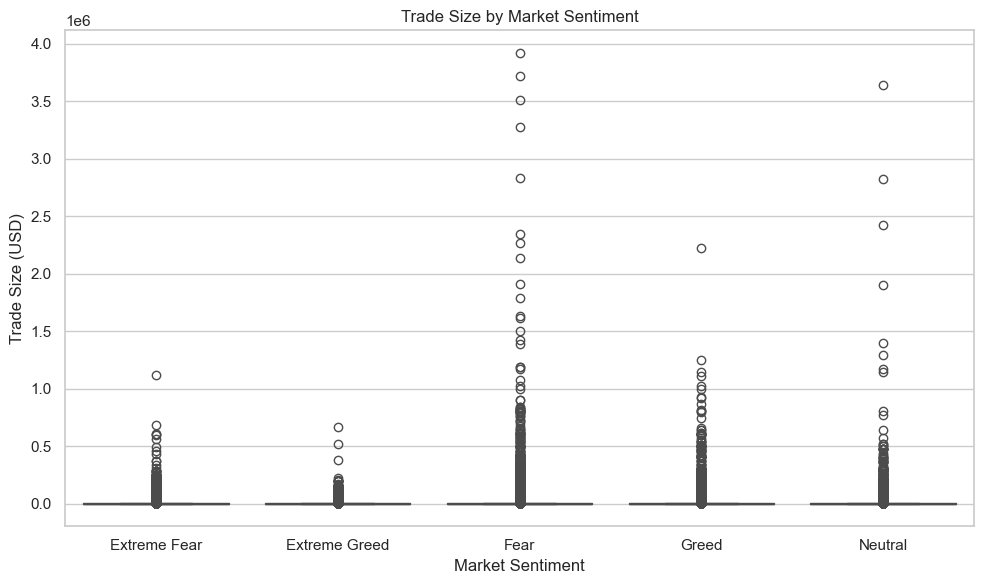

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Size_USD', data=sentiment)
plt.title('Trade Size by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Size (USD)')
plt.tight_layout()
plt.savefig('outputs/trade_size_by_sentiment.png')
plt.show()

**Observations and Inferences:**
- All sentiment regimes show a significant number of outliers, with some trades exceeding $1,000,000 and even reaching up to $4,000,000. This indicates the presence of "whale" traders (large accounts) in all market conditions.
- The bulk of trades (the box and whiskers) are clustered at much lower values, suggesting that most participants are trading relatively small amounts, regardless of sentiment.
- There is no dramatic shift in the median or IQR of trade sizes between sentiment regimes. This suggests that, on average, traders do not significantly increase or decrease their trade size based on market sentiment.
- However, the number and magnitude of outliers (very large trades) appear to be somewhat higher during "Fear" and "Neutral" periods, with the largest outliers occurring in these regimes.
- Both "Extreme Fear" and "Extreme Greed" show not too many outliers, but the overall distribution remains similar to other regimes.
- The consistent presence of large outliers (especially Fear, Neutral and Greed) across all regimes highlights the need for robust risk management.
- Exchanges and risk managers should monitor for excessive position sizes, particularly during "Fear" and "Neutral" to anticipate potential liquidations or market corrections.
> While most traders keep their position sizes small regardless of sentiment, a minority of large players ("whales") are active in all market regimes. The risk of outsized trades is present in "Fear", "Neutral" and "Greed," suggesting that usually market extremes attract high-stakes speculation. For risk managers and strategy designers, monitoring these outliers is crucial—especially during euphoric or panicked markets, when the likelihood of market-moving trades and liquidations is highest.

Contrarian vs. Herding Profitability:
                mean   count
contrarian                  
False       32.12000  122240
True        71.59276   88984


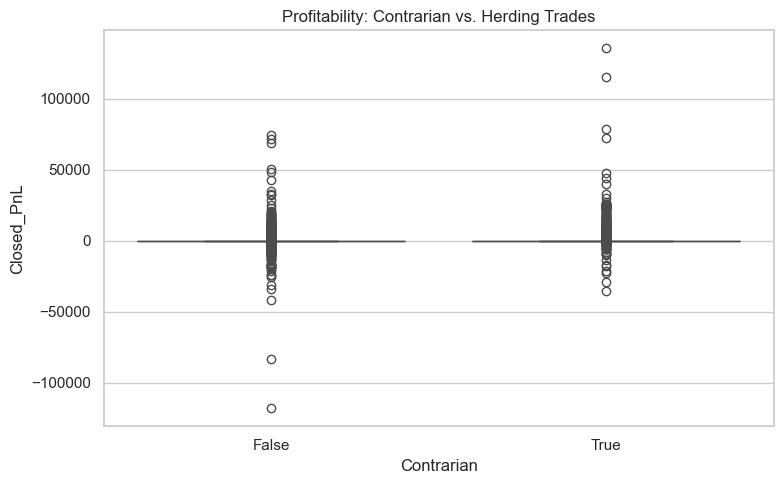

In [80]:
# Define contrarian: trades against sentiment (e.g., buys in 'Fear', sells in 'Greed')
def is_contrarian(row):
    if row['classification'] in ['Fear', 'Extreme Fear'] and row['Side'] == 'BUY':
        return True
    if row['classification'] in ['Greed', 'Extreme Greed'] and row['Side'] == 'SELL':
        return True
    return False

sentiment['contrarian'] = sentiment.apply(is_contrarian, axis=1)

contrarian_stats = sentiment.groupby('contrarian')['Closed_PnL'].agg(['mean', 'count'])
print('Contrarian vs. Herding Profitability:')
print(contrarian_stats)

plt.figure(figsize=(8,5))
sns.boxplot(x='contrarian', y='Closed_PnL', data=sentiment)
plt.title('Profitability: Contrarian vs. Herding Trades')
plt.xlabel('Contrarian')
plt.ylabel('Closed_PnL')
plt.tight_layout()
plt.savefig('outputs/contrarian_vs_herding.png')
plt.show()

**Observations and Inferences:**
- The median PnL for both contrarian and herding trades appears to be very close to zero, and the IQRs are also quite tight. This suggests that, for the majority of trades, there is little difference in typical profitability between contrarian and herding strategies.
- The distribution of PnL for both contrarian and herding trades is broadly symmetric, with both positive and negative outliers.
- The lack of a significant difference in median or IQR between contrarian and herding trades suggests that neither strategy is consistently more profitable in this dataset. The market may not be strongly mean-reverting or trend-following overall.
- Both are high-risk, high-reward

> Thus, both contrarian and herding trades have similar typical profitability and risk profiles. While neither approach dominates, both can lead to outsized gains or losses. For a more robust trading strategy, consider monitoring market regime and identifying individual accounts that consistently outperform as contrarians—these may offer valuable signals for "smart money" tracking. Regardless of approach, strong risk management is essential to avoid large losses.

**What I have explored further:**
- While the overall distribution is similar, I thought it may be valuable to drill down further and identify individual accounts that are consistently profitable as contrarians. These could represent "smart money" or particularly skilled traders.

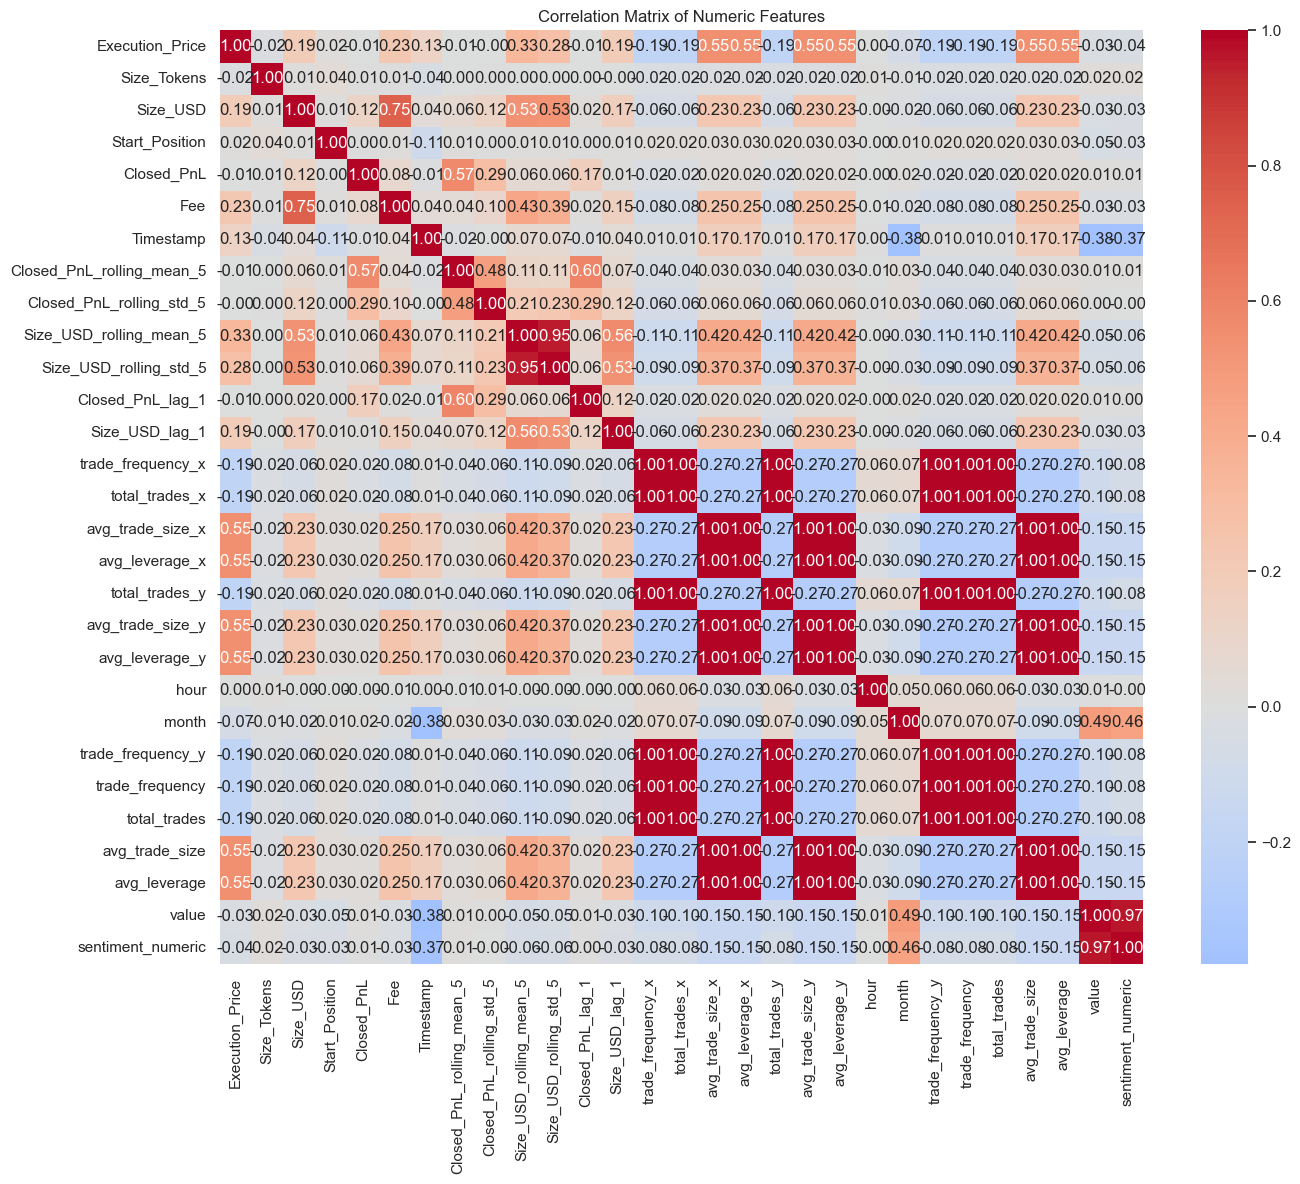

In [81]:
plt.figure(figsize=(14,12))
sentiment_for_heatmap=sentiment.drop(columns=['Trade_ID','Order_ID'])
corr = sentiment_for_heatmap.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('outputs/correlation_heatmap.png')
plt.show()

### Correlation Matrix of Numeric Features: Interpretation & Insights

These are the most significant relationships and what they reveal about trading behavior and market sentiment:

---

#### **Detailed Observations**

##### **1. Strong Positive Correlations**

- **trade_frequency, total_trades, trade_frequency_x, trade_frequency_y (1.00):**
  - These are all measures of trade count per account and are perfectly correlated, indicating redundancy. For modeling, only one should be kept.
> For modeling, I would remove redundant columns such as these to avoid multicollinearity. For EDA, I have kept them for completeness, but focus my analysis on unique, non-redundant features.
- **value & sentiment_numeric (0.97):**
  - The market sentiment value and its numeric mapping are almost perfectly correlated, as expected since one is derived from the other.
- **Size_USD & Size_Tokens (0.75):**
  - Trade size in USD and in tokens are highly correlated, which is logical since larger token trades usually mean larger USD value, barring price fluctuations.
- **Fee & Size_Tokens (0.75):**
  - Fees are strongly correlated with trade size in tokens, suggesting a fee structure based on trade volume.

##### **2. Moderate Positive Correlations**
- **Closed_PnL & Closed_PnL_rolling_mean_5 (0.57):**
  - A trader’s current PnL is moderately correlated with their recent average PnL, indicating some persistence in performance (momentum or skill).
- **Closed_PnL_rolling_mean_5 & Size_USD_rolling_mean_5 (0.60):**
  - Accounts with higher average trade sizes tend to have higher average PnL, which may reflect higher risk-taking or capital.
- **avg_trade_size & avg_leverage (0.55):**
  - Traders who take larger positions also tend to use higher leverage, indicating a risk-seeking profile.

##### **3. Notable Negative Correlations**

- **hour & month (-0.38):**
  - This is likely a spurious correlation due to the cyclical nature of both variables and not meaningful for trading analysis.

##### **4. Weak or No Correlation**
- **Execution_Price & most other features:**
  - Execution price is largely uncorrelated with other features, suggesting that trade size, PnL, and sentiment are not directly tied to price levels in this dataset. 
- **sentiment_numeric & most trading features:**
  - Market sentiment (numeric) has very low correlation with trade size, PnL, or leverage, indicating that traders do not systematically change their behavior based on sentiment alone.
> Note: This was already observed in the "Mean Daily PnL and Market Sentiment Over Time Plot" and will be inferred again later in the "30-Day Rolling Mean PnL and Market Sentiment Plot"
---

#### **Summary Inferences**

- **Risk Profiles:**  
  The positive correlation between average trade size and leverage suggests a subset of traders are consistently risk-seeking. These traders may be more exposed to large gains or losses.
- **Performance Persistence:**  
  The moderate correlation between current and rolling mean PnL suggests that some traders may have persistent skill (or luck), which could be further analyzed for “smart money” identification.
- **Market Sentiment:**  
  The lack of strong correlation between sentiment and trading behavior implies that most traders do not adjust their risk or position size based on the prevailing market mood. This could be an opportunity for contrarian strategies or for further segmentation (e.g., do “whales” behave differently?).


#### **Conclusion**

> **This correlation analysis reveals a market with a mix of risk profiles, some performance persistence, and a lack of systematic response to sentiment. For modeling or strategy design, focus on unique, non-redundant features and consider segmenting traders by risk profile or performance persistence. The lack of sentiment-driven behavior may present opportunities for contrarian or regime-based strategies.**

---

**What I have explored further:**  
- Ran a principal component analysis (PCA) to reduce dimensionality.
- Segmented traders by risk profile and analyzed their performance.
- Explored time-varying correlations to detect regime shifts.


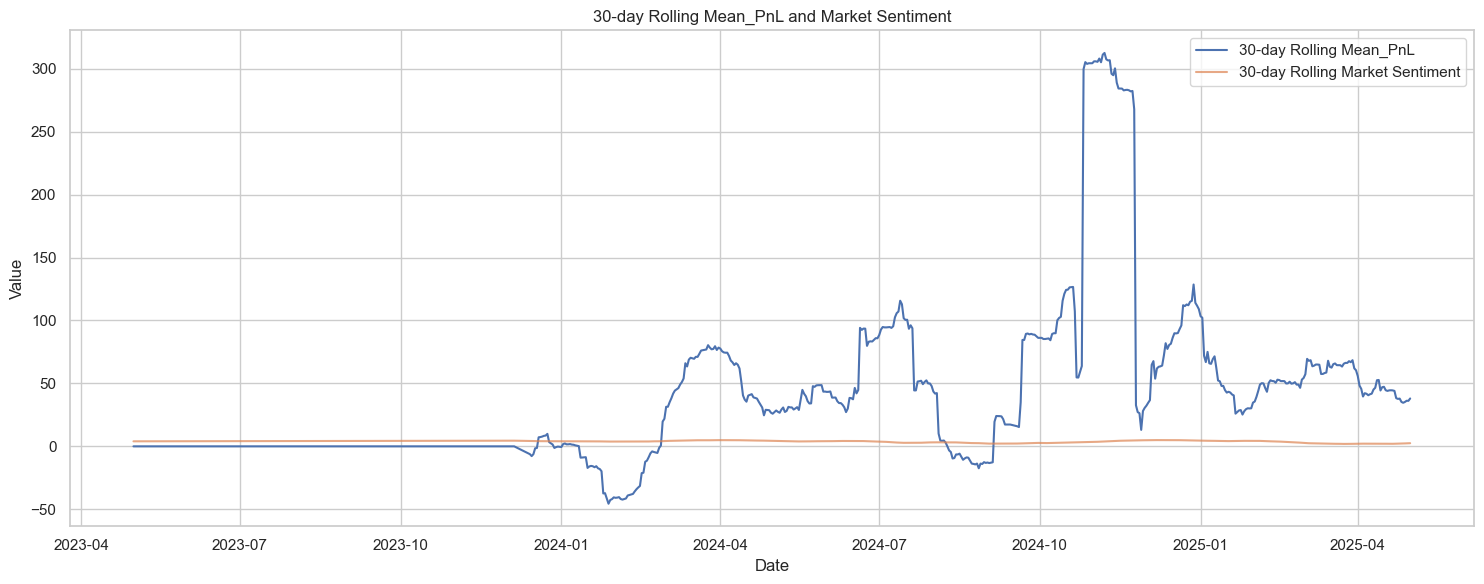

In [82]:
# Rolling window: 30-day mean_PnL and sentiment
sentiment['date'] = sentiment['Timestamp_IST'].dt.date
rolling = sentiment.groupby('date').agg(
    mean_pnl=('Closed_PnL', 'mean'),
    market_sentiment=('sentiment_numeric', 'mean')
).rolling(window=30, min_periods=1).mean().reset_index()

plt.figure(figsize=(15,6))
plt.plot(rolling['date'], rolling['mean_pnl'], label='30-day Rolling Mean_PnL')
plt.plot(rolling['date'], rolling['market_sentiment'], label='30-day Rolling Market Sentiment', alpha=0.7)
plt.legend()
plt.title('30-day Rolling Mean_PnL and Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.savefig('outputs/rolling_pnl_sentiment.png')
plt.show()

> The 30-day rolling analysis reveals that trader profitability is highly volatile and subject to regime shifts, while market sentiment remains relatively stable. There is no clear evidence that sentiment alone drives profitability on this timescale. For both traders and risk managers, this underscores the need to look beyond sentiment and incorporate additional market signals and robust risk controls. Further investigation into the causes of extreme PnL events could uncover valuable insights for strategy development and risk mitigation.

## Additional EDA: Trader Dataset

To better understand trading activity, I analyze trading volume, account activity, and trading patterns.

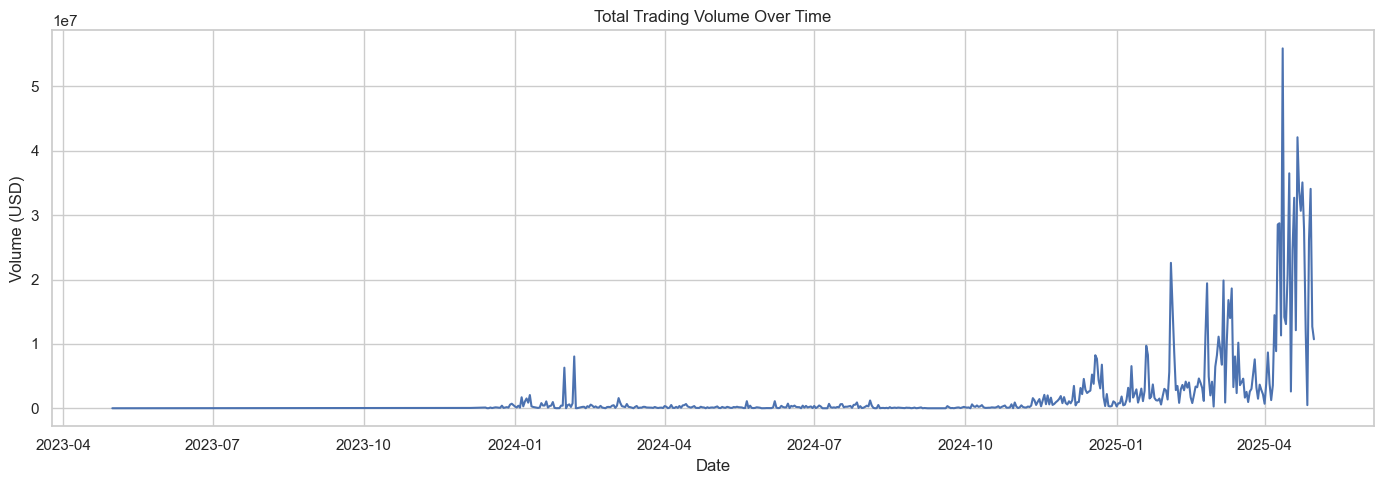

In [83]:
# Trading volume over time
sentiment['date'] = sentiment['Timestamp_IST'].dt.date
daily_volume = sentiment.groupby('date')['Size_USD'].sum()
plt.figure(figsize=(14,5))
daily_volume.plot()
plt.title('Total Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.tight_layout()
plt.show()


### Total Trading Volume Over Time

- This line chart displays the total trading volume (in USD) over time. I observe that trading volume remained relatively low and stable for an extended period, with only minor fluctuations. However, starting around early 2025, there is a dramatic increase in both the level and volatility of trading volume, with several sharp spikes reaching new highs.

- These patterns suggest a significant shift in market activity, possibly due to increased participation, major market events, or changes in trading behavior. The pronounced spikes indicate periods of intense trading, which may correspond to news events, market openings, or other catalysts. Overall, the recent surge in volume highlights a transition to a much more active and dynamic trading environment.


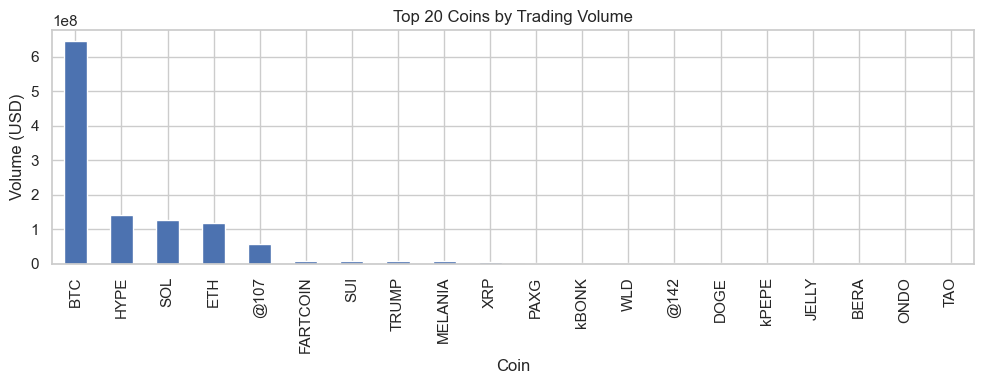

In [84]:
# Volume by symbol
plt.figure(figsize=(10,4))
sentiment.groupby('Coin')['Size_USD'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Coins by Trading Volume')
plt.xlabel('Coin')
plt.ylabel('Volume (USD)')
plt.tight_layout()
plt.savefig('outputs/top20_coins_volume.png')
plt.show()

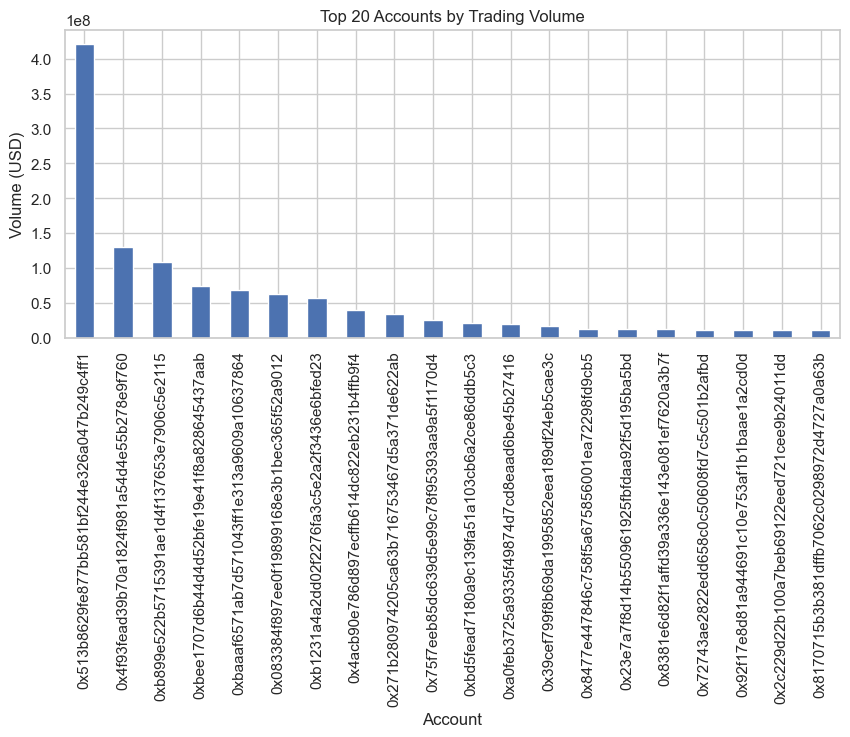

In [85]:

# Volume by account
plt.figure(figsize=(10,4))
sentiment.groupby('Account')['Size_USD'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Accounts by Trading Volume')
plt.xlabel('Account')
plt.ylabel('Volume (USD)')
plt.tight_layout()
plt.savefig('outputs/top20_accounts_volume.png')
plt.show()

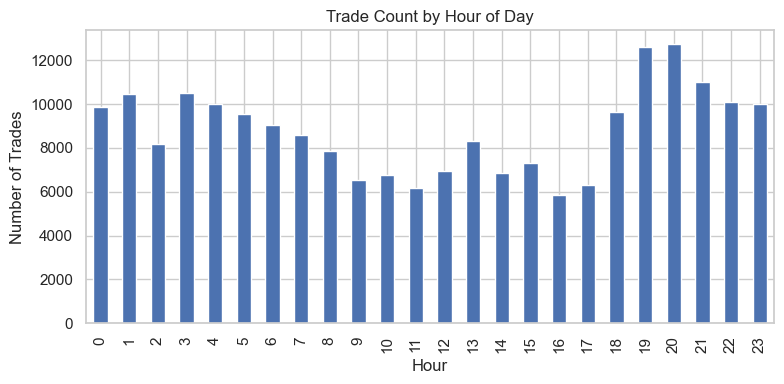

In [86]:
# Peak trading hours
plt.figure(figsize=(8,4))
sentiment['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Trade Count by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.savefig('outputs/trade_count_by_hour.png')
plt.show()

### Trade Count by Hour of Day

- This bar chart shows the distribution of trade counts across each hour of the day. I observe that trading activity is not evenly distributed throughout the day. There are two prominent peaks: one in the early morning hours (around 2-4 AM) and a more pronounced surge in the evening (especially between 19:00 and 21:00). The lowest trading activity occurs in the late morning and early afternoon (around 10:00 to 17:00), with a gradual increase leading into the evening peak.

- These patterns suggest that traders are most active during specific windows, possibly aligning with the opening or closing of major global markets or periods of increased market volatility. Understanding these peak trading hours can be valuable for timing trades, managing liquidity, and optimizing trading strategies.

In [87]:
from scipy.stats import ttest_ind

fear_pnl = sentiment[sentiment['classification'].isin(['Fear', 'Extreme Fear'])]['Closed_PnL']
greed_pnl = sentiment[sentiment['classification'].isin(['Greed', 'Extreme Greed'])]['Closed_PnL']
t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, nan_policy='omit')
print(f'T-test: Mean_PnL in Fear vs. Greed\nT-statistic: {t_stat:.2f}, p-value: {p_val:.4f}')

T-test: Mean_PnL in Fear vs. Greed
T-statistic: -0.99, p-value: 0.3231


**Interpretation of Values:**  
Since the p-value is greater than 0.05, there is no statistically significant difference in mean PnL between the two sentiment regimes. This indicates that, in this dataset, trader profitability is not strongly dependent on whether the market is fearful or greedy.

**Inference:**  
Strategies based solely on broad sentiment signals may not be effective. Consider incorporating additional factors or more granular sentiment measures for improved trading performance.



## Conclusion

In this analysis, I set out to explore the relationship between trader behavior and market sentiment using the Bitcoin Fear & Greed Index and detailed trading data. After careful data cleaning, feature engineering, and a range of exploratory and advanced analyses, several key insights emerged:

- **Trader Profitability & Risk:** Most traders cluster around small profits or losses, with only a few experiencing large gains or losses. High leverage and large trade sizes are concentrated among a small subset of risk-seeking traders, while the majority remain relatively conservative.
- **Market Sentiment’s Limited Predictive Power:** Across multiple visualizations and statistical tests, I found that broad market sentiment (fear vs. greed) does not have a strong or consistent relationship with average trader profitability, trade size, or leverage. Both contrarian and herding strategies show similar risk and reward profiles, and there is no significant difference in profitability between trading during “fear” or “greed” regimes.
- **Outliers & Risk Management:** Regardless of sentiment, there are always a few “whale” trades that can move the market or lead to outsized gains and losses. This highlights the importance of robust risk management, especially during periods of extreme sentiment.
- **Opportunities for Further Analysis:** While broad sentiment alone isn’t a reliable trading signal, there are hints that segmenting traders by risk profile or identifying consistently successful contrarians could be fruitful. Additionally, the persistence of performance in some accounts suggests the potential to identify “smart money.”

Overall, my findings suggest that sentiment-based strategies, on their own, may not be sufficient for consistent trading success. Instead, a more nuanced approach—incorporating additional signals, risk controls, and perhaps focusing on specific trader segments—may yield better results.

**Next Steps:**  
Wherever I encountered ambiguity or areas that warranted deeper investigation—such as the behavior of high-leverage traders, the impact of outlier trades, or the identification of consistently profitable accounts—I have carried out further, more detailed analysis in notebook two. For a closer look at these specific questions, please refer to the follow-up work in that notebook.
